In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
data.shape

(614, 13)

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
data = data.drop('Loan_ID', axis = 1)

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
data.describe(include = 'object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [11]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
cat_cols = data.dtypes == 'object'

In [17]:
cat_cols = list(cat_cols[cat_cols].index)

TypeError: list indices must be integers or slices, not list

In [16]:
cat_cols

[True, True, True, True, True, True, True]

In [18]:
cat_cols = data.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)

In [19]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [20]:
num_cols = data.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
cat_cols.remove('Loan_Status')

In [21]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [22]:
data[cat_cols].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [24]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

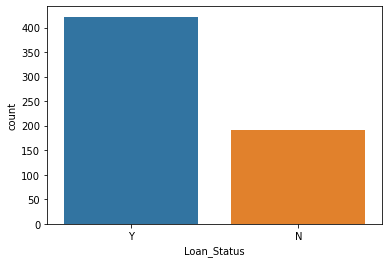

In [25]:
sns.countplot(data=data, x='Loan_Status')
plt.show()

In [26]:
target = 'Loan_Status'
data[target].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [27]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


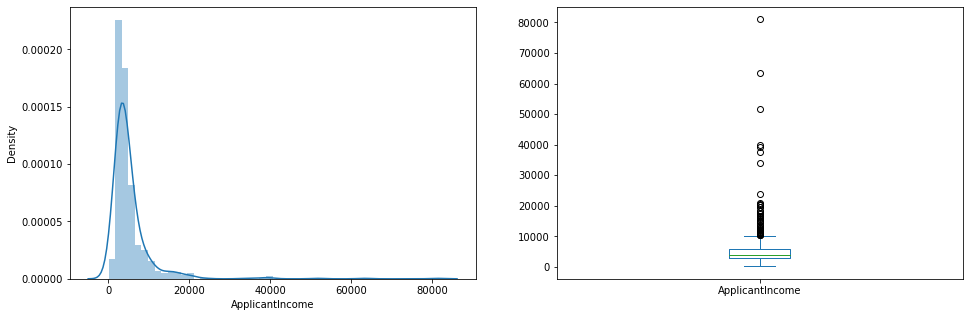

In [28]:
plt.subplot(121)
sns.distplot(data["ApplicantIncome"])

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

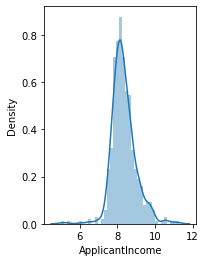

In [29]:
plt.subplot(121)
sns.distplot(np.log(data["ApplicantIncome"]))

plt.show()

In [31]:
np.log(10000000)

16.11809565095832

In [32]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


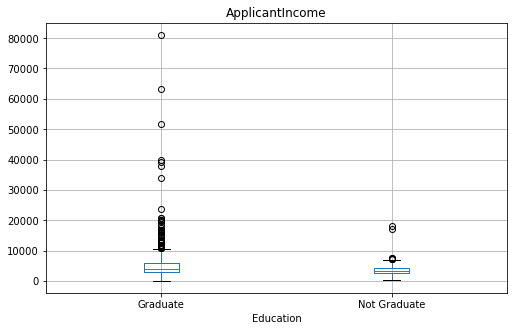

In [33]:
data.boxplot(column='ApplicantIncome', by="Education", figsize=(8,5))
plt.suptitle("")
plt.show()

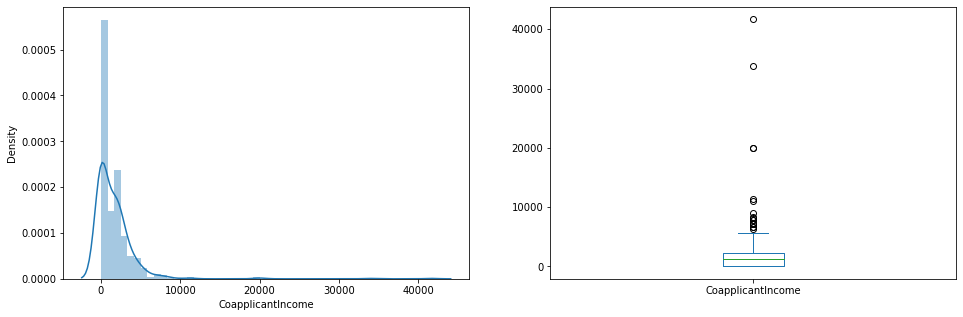

In [34]:
plt.subplot(121)
sns.distplot(data["CoapplicantIncome"])

plt.subplot(122)
data["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

In [35]:
data.groupby("Loan_Status").mean()['ApplicantIncome']

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

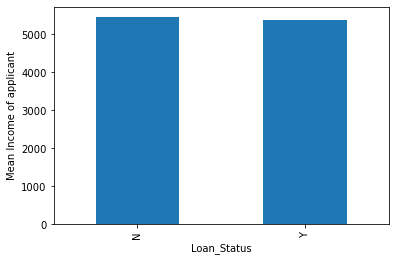

In [36]:
data.groupby("Loan_Status").mean()['ApplicantIncome'].plot.bar()
plt.ylabel("Mean Income of applicant")
plt.show()

In [37]:
bins=[0,2500,4000,6000, 8000, 10000, 20000, 40000, 81000]
group=['Low','Average','medium', 'H1', 'h2', 'h3', 'h4' , 'Very high']

In [38]:
data['Income_bin']= pd.cut(data['ApplicantIncome'],bins,labels=group)

In [39]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium


In [40]:
pd.crosstab(data["Income_bin"],data["Loan_Status"])

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
medium,45,98
H1,20,34
h2,9,22
h3,13,27
h4,3,6
Very high,1,2


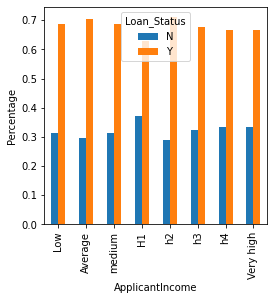

In [41]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"])

Income_bin.div(Income_bin.sum(axis=1),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [42]:
bins=[0,1000,3000,42000]
group =['Low','Average','High']
data['CoapplicantIncome_bin']=pd.cut(data["CoapplicantIncome"],bins,labels=group)

In [43]:
pd.crosstab(data["CoapplicantIncome_bin"],data["Loan_Status"])



Loan_Status,N,Y
CoapplicantIncome_bin,,
Low,3,19
Average,61,161
High,32,65


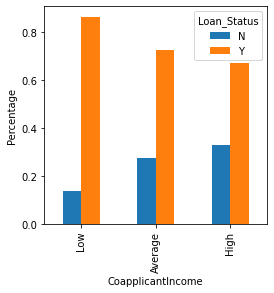

In [44]:
CoapplicantIncome_Bin = pd.crosstab(data["CoapplicantIncome_bin"],data["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(axis = 1),axis=0).plot(kind='bar',figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [45]:
data['CoapplicantIncome'].value_counts().head()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
Name: CoapplicantIncome, dtype: int64

In [46]:
# New feature:  total household income
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

In [47]:
bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],bins,labels=group)

In [48]:
pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"])



Loan_Status,N,Y
TotalIncome_bin,,
Low,20,27
Average,69,154
High,61,151
Very High,42,90


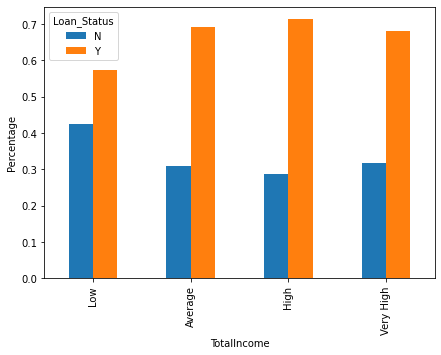

In [49]:
TotalIncome = pd.crosstab(data["TotalIncome_bin"],data["Loan_Status"])
TotalIncome.div(TotalIncome.sum(axis = 1),axis=0).plot(kind='bar', figsize=(7,5))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

In [50]:
data = data.drop(["Income_bin","CoapplicantIncome_bin","TotalIncome_bin"],axis=1)

In [51]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [52]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')



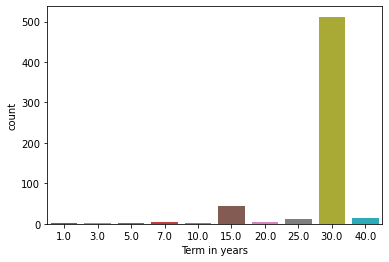

In [53]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Term in years")
plt.show()